## **LaneGuard: Advanced Lane Detection System**

In [7]:
# Importing necessary packages
import matplotlib.pyplot as plt  # For plotting images
import matplotlib.image as mpimg  # For reading and writing images
import numpy as np  # For numerical operations
import cv2  # OpenCV library for image and video processing
import os  # For interacting with the operating system
import glob  # For finding files matching a certain pattern
from moviepy.editor import VideoFileClip  # For processing video files

# Magic command to display plots in Jupyter Notebook
%matplotlib inline


In [9]:
def list_images(images, cols=2, rows=5, cmap=None):
    """
    Display a list of images in a single figure using matplotlib.

    Parameters:
        images (list): List of np.arrays compatible with plt.imshow.
        cols (int, optional): Number of columns in the figure. Default is 2.
        rows (int, optional): Number of rows in the figure. Default is 5.
        cmap (optional): Used to display gray images. Default is None.
    """

    # Create a new figure with the specified size
    plt.figure(figsize=(10, 11))

    # Iterate through the list of images and plot them in a grid
    for i, image in enumerate(images):
        # Create a new subplot for each image
        plt.subplot(rows, cols, i+1)

        # Use grayscale colormap if the image has only one channel
        cmap = 'gray' if len(image.shape) == 2 else cmap

        # Display the image
        plt.imshow(image, cmap=cmap)

        # Remove ticks from the x and y axes
        plt.xticks([])
        plt.yticks([])

    # Adjust the spacing between subplots and display the figure
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()


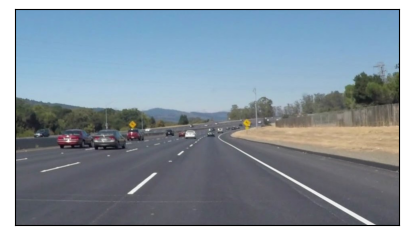

In [10]:
# Reading in the test images
test_images = [plt.imread(img) for img in glob.glob(
    'test_images/01. solidWhiteCurve.jpg')]

# Displaying the test images using the previously defined function list_images()
list_images(test_images)


## Color Selection

In [11]:
def RGB_color_selection(image):
    """
    Apply color selection to RGB images to blackout everything except for white and yellow lane lines.

    Args:
    image (numpy array): An RGB image as a numpy array.

    Returns:
    numpy array: A masked image containing only the white and yellow lane lines.
    """
    # Define a lower and upper threshold for white color
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Define a lower and upper threshold for yellow color
    lower_yellow = np.array([175, 175, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 255], dtype=np.uint8)

    # Create masks for white and yellow colors
    white_mask = cv2.inRange(image, lower_white, upper_white)
    yellow_mask = cv2.inRange(image, lower_yellow, upper_yellow)

    # Combine the white and yellow masks
    combined_mask = cv2.bitwise_or(white_mask, yellow_mask)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=combined_mask)

    return masked_image


Applying color selection to `test_images` in the RGB color space.

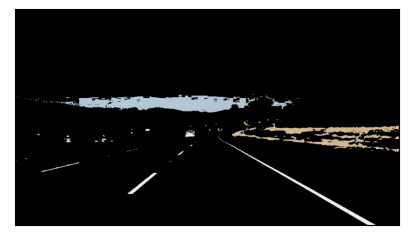

In [12]:
# Display the output of applying the RGB color selection to the test images
# list_images() function is used to display the results
list_images(list(map(RGB_color_selection, test_images)))

### a) HSV color space

`HSV` stands for hue, saturation, and value, and it is often used as an alternative representation of the RGB color model. In the HSV color space, hue represents the actual color, saturation represents the intensity of that color, and value represents the brightness of that color. This representation can be useful for certain image processing tasks, such as color-based segmentation, since it allows us to separate color information from brightness information.

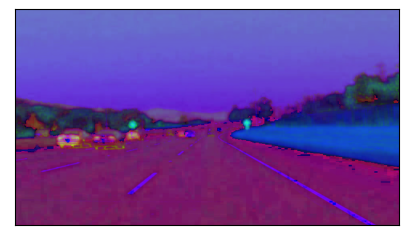

In [14]:
def convert_hsv(image):
    """
    Convert an RGB image to the HSV color space.

    Args:
        image: np.array. An RGB image as an array compatible with plt.imshow.

    Returns:
        np.array. The input image converted to the HSV color space.
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


# Test the convert_hsv function on the test images
list_images(list(map(convert_hsv, test_images)))


In [15]:
def HSV_color_selection(image):
    """
    Apply color selection to the HSV images to blackout everything except for white and yellow lane lines.
        Parameters:
            image: An np.array compatible with plt.imshow.
    """
    # Convert the input image to HSV
    converted_image = convert_hsv(image)

    # Define the threshold ranges for white and yellow color masks
    lower_white = np.uint8([0, 0, 210])
    upper_white = np.uint8([255, 30, 255])
    lower_yellow = np.uint8([18, 80, 80])
    upper_yellow = np.uint8([30, 255, 255])

    # Create masks for white and yellow regions
    white_mask = cv2.inRange(converted_image, lower_white, upper_white)
    yellow_mask = cv2.inRange(converted_image, lower_yellow, upper_yellow)

    # Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    return masked_image


Applying color selection to `test_images` in the HSV color space.

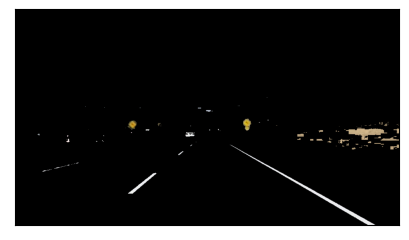

In [16]:
"""The list_images function displays a list of images in a single figure with Matplotlib. It takes a list of NumPy arrays compatible with plt.imshow as input, along with optional parameters specifying the number of columns and rows in the figure, and the colormap to use when displaying grayscale images. It then plots each image in a separate subplot, with no padding between subplots, and displays the resulting figure."""
list_images(list(map(HSV_color_selection, test_images)))


### HSL color space

HSL stands for Hue, Saturation, and Lightness, and it is often used in color-related applications such as computer graphics, image processing, and color theory. The Hue dimension represents the actual color of an object, while the Saturation dimension represents how much of that color is present, and the Lightness dimension represents the brightness of the color.


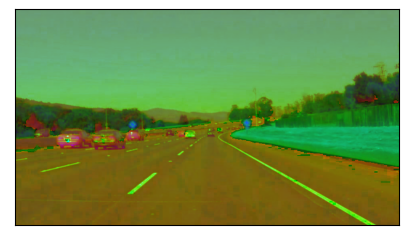

In [17]:
def convert_hsl(image):
    """
    Convert RGB images to HSL.
        Parameters:
            image: An np.array compatible with plt.imshow.
        Returns:
            An np.array of the HSL representation of the input image.
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)


# Read in test images and convert to HSL
test_images = [plt.imread(img) for img in glob.glob(
    'test_images/01. solidWhiteCurve.jpg')]
list_images(list(map(convert_hsl, test_images)))


In [18]:
def HSL_color_selection(image):
    """
    Apply color selection to the HSL images to isolate white and yellow lane lines.
        Parameters:
            image: A numpy array compatible with plt.imshow.

        Returns:
            A masked image containing only the white and yellow lane lines in the input image.
    """
    # Convert the input image to HSL
    converted_image = convert_hsl(image)

    # Define the color thresholds for white
    lower_threshold_white = np.uint8([0, 200, 0])
    upper_threshold_white = np.uint8([255, 255, 255])

    # Define the color thresholds for yellow
    lower_threshold_yellow = np.uint8([10, 0, 100])
    upper_threshold_yellow = np.uint8([40, 255, 255])

    # Create a mask for the white and yellow colors
    white_mask = cv2.inRange(
        converted_image, lower_threshold_white, upper_threshold_white)
    yellow_mask = cv2.inRange(
        converted_image, lower_threshold_yellow, upper_threshold_yellow)

    # Combine the white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)

    # Apply the mask to the input image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    return masked_image


To apply color selection to test_images in the HSL color space, we can use the HSL_color_selection function defined earlier.

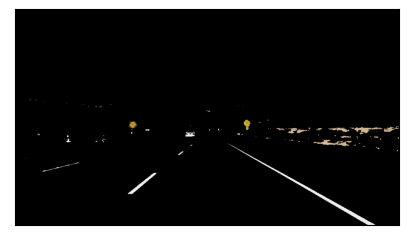

In [19]:
list_images(list(map(HSL_color_selection, test_images)))

HSL is particularly useful in this case because it separates color information into hue, saturation, and lightness components, which makes it easier to isolate specific colors and ignore others. It's also worth noting that different lighting conditions can affect the appearance of lane lines, and using the appropriate color space can help to mitigate these effects.

In [20]:
"""This applies the color selection to test_images in the HSL color space and stores the resulting images in the color_selected_images list."""
color_selected_images = list(map(HSL_color_selection, test_images))


## Canny Edge Detection

The Canny edge detector is a popular edge detection algorithm that uses a multi-stage process to detect edges in images. The algorithm works by first smoothing the image to reduce noise, then calculating the gradient magnitude and orientation, and finally using non-maximum suppression and hysteresis thresholding to determine the final edge map. The result is a binary image where pixels marked as edges have a value of 1, and those that are not edges have a value of 0.

In [21]:
def gray_scale(image):
    """
    Convert RGB images to grayscale.
        Parameters:
            image: An np.array compatible with plt.imshow.
        Returns:
            The grayscale version of the input image.
    """
    # Convert the input image to grayscale using OpenCV's COLOR_RGB2GRAY function
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


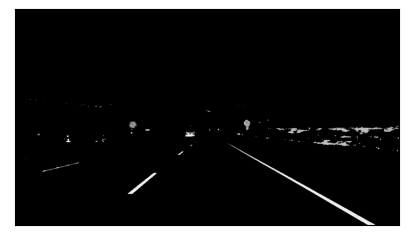

In [22]:
# Apply the gray_scale() function to all images in the color_selected_images list
# using the built-in map() function and store the results in a new list called gray_images
gray_images = list(map(gray_scale, color_selected_images))

# Display the resulting grayscale images using the list_images() function
list_images(gray_images)


## We will now apply Gaussian smoothing to the gray scale images. This will help to reduce noise in the images and produce a smoother gradient.

In [24]:
def gaussian_smoothing(image, kernel_size=13):
    """
    Apply a Gaussian filter to the input image to reduce noise and smooth out the edges.

    Parameters:
        image: np.array
            The image to apply the filter to.

        kernel_size: int, default=13
            The size of the Gaussian kernel that will be used to apply the filter. 
            It should be an odd number (3, 5, 7, ...) and affects the performance of the detector.

    Returns:
        np.array
            The smoothed image after applying the Gaussian filter.
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


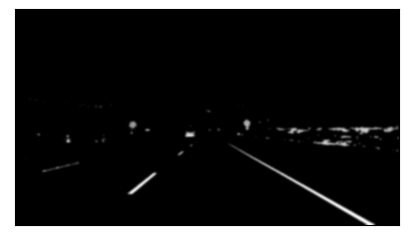

In [25]:
# Apply Gaussian smoothing to the grayscale images
blur_images = list(map(gaussian_smoothing, gray_images))

# Display the blurred images
list_images(blur_images)


### Applying Canny Edge Detection

The *Canny edge detection* algorithm is now applied to the preprocessed images, in order to detect the edges in the images. This algorithm identifies the edges in the image by computing the gradient of the intensity of the image, and then applies non-maximum suppression to remove spurious responses to edge detection. Finally, the algorithm applies hysteresis thresholding to distinguish between strong and weak edges, in order to remove weak edges that do not contribute to the overall shape of the object.

The Canny edge detection algorithm takes two threshold values as input parameters: the low threshold and the high threshold. These threshold values are used to distinguish between strong and weak edges. Edges that are detected above the high threshold are considered strong edges, while those detected below the low threshold are considered weak edges. Edges that fall between the high and low thresholds are considered to be part of an edge if they are connected to a strong edge, otherwise they are discarded.

In this case, we will use a low threshold of 50 and a high threshold of 150, which have been shown to work well for this application.

In [26]:
def canny_detector(image, low_threshold=50, high_threshold=150):
    """
    Apply Canny Edge Detection algorithm to the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
            low_threshold (Default = 50).
            high_threshold (Default = 150).
    """
    return cv2.Canny(image, low_threshold, high_threshold)


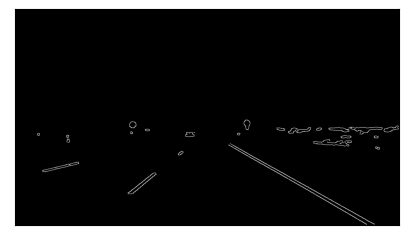

In [27]:
"""This code applies the Canny Edge Detection algorithm to the Gaussian smoothed images in order to detect edges of lane lines. The resulting binary images indicate the presence of edges through white pixels and the absence of edges through black pixels."""
edge_detected_images = list(map(canny_detector, blur_images))
list_images(edge_detected_images)


## Region of interest

In [28]:
def region_selection(image):
    """
    Selects the region of interest in the input image by creating a mask.
    The mask is generated by selecting a polygonal area defined by vertices on the input image.
    The area outside the polygon is set to black, while the area inside is retained.

    Parameters:
    image: np.array, the image to select the region of interest on

    Returns:
    masked_image: np.array, the input image with the region of interest retained and the rest of the image masked
    """
    # Create a blank mask with the same shape as the input image
    mask = np.zeros_like(image)

    # Define a color to fill the mask with, depending on the number of channels in the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    # Define the vertices of the polygonal region of interest
    rows, cols = image.shape[:2]
    bottom_left = [cols * 0.1, rows * 0.95]
    top_left = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right = [cols * 0.6, rows * 0.6]
    vertices = np.array(
        [[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)

    # Fill the polygon defined by the vertices with the ignore_mask_color to create the mask
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    # Use the bitwise AND operation to retain only the region of interest in the input image
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image


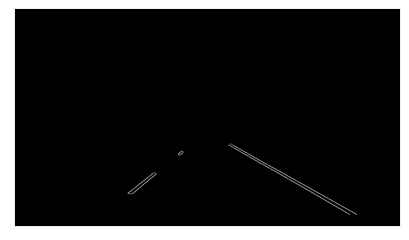

In [29]:
masked_image = list(map(region_selection, edge_detected_images))
list_images(masked_image)

## Hough Transform

To apply the Hough transform, we will use the `cv2.HoughLinesP()` function. This function detects lines in an image using the Probabilistic Hough Transform.

The Probabilistic Hough Transform is a modification of the Hough Transform, where we randomly sample a subset of points from the edge-detected image and then apply the standard Hough Transform on these points, instead of applying it to all the points in the image. This technique is more efficient and faster than the standard Hough Transform.

Once we apply the Probabilistic Hough Transform, we will obtain a set of lines in the image. We will then use these lines to determine the left and right lane lines.

In [30]:
def hough_transform(image):
    """
    Apply Hough Transform to the input image to detect lines.
    Parameters:
        image: An np.array compatible with plt.imshow.
    Returns:
        A list of the detected lines in (x1,y1,x2,y2) format.
    """
    rho = 1              # Distance resolution of the accumulator in pixels.
    theta = np.pi/180    # Angle resolution of the accumulator in radians.
    # Only lines that are greater than threshold will be returned.
    threshold = 20
    minLineLength = 20   # Line segments shorter than that are rejected.
    # Maximum allowed gap between points on the same line to link them.
    maxLineGap = 300

    # Apply Hough Transform
    return cv2.HoughLinesP(image, rho=rho, theta=theta, threshold=threshold,
                           minLineLength=minLineLength, maxLineGap=maxLineGap)


`hough_lines` contains the list of lines detected in the selected region. Now, we will draw these detected lines onto the original `test_images`.

In [31]:
# Apply the Hough transform function to the masked images to detect lines in the selected region.
hough_lines = list(map(hough_transform, masked_image))


In [33]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=2):
    """
    Draw lines onto the input image.
        Parameters:
            image: An np.array compatible with plt.imshow.
            lines: The lines we want to draw.
            color (Default = red): Line color.
            thickness (Default = 2): Line thickness.
    """
    image = np.copy(image)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image


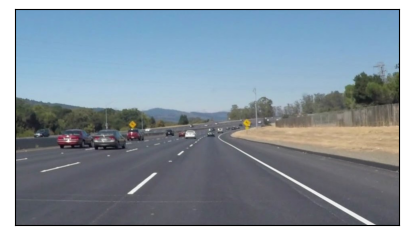

In [34]:
# Load the images containing the lane lines to be detected
line_images = [plt.imread(img) for img in glob.glob(
    'test_images/01. solidWhiteCurve.jpg')]

# Display the images
list_images(line_images)


## Averaging and extrapolating the lane lines

In [35]:
def average_slope_intercept(lines):
    """
    Calculate the slope and intercept of the left and right lanes in each image.

    Parameters:
        lines: A list of Hough lines in the form of (x1, y1, x2, y2).

    Returns:
        A tuple containing the slope and intercept of the left and right lanes, respectively.
        If no lines are detected for a lane, the corresponding value in the tuple is None.
    """

    # Initialize empty lists to store left and right lane slopes, intercepts, and lengths
    left_lines = []
    left_weights = []
    right_lines = []
    right_weights = []

    # Loop over all Hough lines to calculate slope, intercept, and length for each line
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))

            # Classify the line as part of the left lane or right lane based on its slope
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append(length)
            else:
                right_lines.append((slope, intercept))
                right_weights.append(length)

    # Compute the weighted average of slopes and intercepts for the left and right lanes
    left_lane = np.dot(left_weights, left_lines) / \
        np.sum(left_weights) if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / \
        np.sum(right_weights) if len(right_weights) > 0 else None

    # Return the slope and intercept of the left and right lanes as a tuple
    return left_lane, right_lane


In [36]:
def pixel_points(y1, y2, line):
    """
    Converts the slope and intercept of each line into pixel points.
        Parameters:
            y1: y-value of the line's starting point.
            y2: y-value of the line's end point.
            line: The slope and intercept of the line.
    """
    # Check if the line exists
    if line is None:
        return None
    # Get the slope and intercept of the line
    slope, intercept = line
    # Calculate the x-coordinates of the starting and ending points of the line
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    # Convert the y-coordinates to integers
    y1 = int(y1)
    y2 = int(y2)
    # Return the starting and ending points of the line as tuples
    return ((x1, y1), (x2, y2))


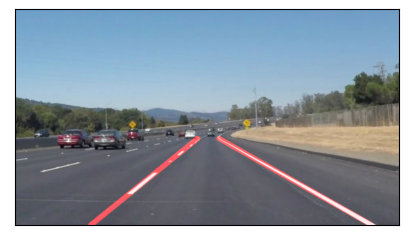

In [37]:
def lane_lines(image, lines):
    """
    Convert Hough lines to full-length lines using slope and intercept.
        Parameters:
            image: The input test image.
            lines: The output lines from Hough Transform.
    """
    # Find the average slope and intercept of left and right lane lines
    left_lane, right_lane = average_slope_intercept(lines)

    # Define the y-coordinates of the starting and ending points of the lane lines
    y1 = image.shape[0]
    y2 = y1 * 0.6

    # Convert the slope and intercept of left and right lane lines into pixel points
    left_line = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)

    return left_line, right_line


def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=12):
    """
    Draw left and right lane lines onto the input image.
        Parameters:
            image: The input test image.
            lines: The output lines from Hough Transform.
            color (Default = red): Line color.
            thickness (Default = 12): Line thickness. 
    """
    # Create an empty image with the same dimensions as the input image
    line_image = np.zeros_like(image)

    # Draw left and right lane lines onto the empty image
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)

    # Combine the original image with the image containing the lane lines
    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)


# Generate lane images for each test image
lane_images = []
for image, lines in zip(test_images, hough_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))

# Display the lane images
list_images(lane_images)


## Apply on video streams

Now, we'll use the above functions to detect lane lines from a video stream.

In [38]:
# Import necessary libraries for editing, saving, and displaying video clips
from moviepy import *
from IPython.display import HTML
from IPython.display import Image


In [39]:
# Define a function to process each frame of the video and detect lane lines
def frame_processor(image):
    """
    Process the input frame to detect lane lines.
    Parameters:
    image: Single video frame."""
    color_select = HSL_color_selection(image)
    gray = gray_scale(color_select)
    smooth = gaussian_smoothing(gray)
    edges = canny_detector(smooth)
    region = region_selection(edges)
    hough = hough_transform(region)
    result = draw_lane_lines(image, lane_lines(image, hough))
    return result


In [40]:
def process_video(test_video, output_video):
    """
    Reads the input video stream and produces a video file with detected lane lines.

    Args:
        test_video (str): The filename of the input video.
        output_video (str): The filename of the output video with detected lane lines.
    """
    # Load input video
    input_video = VideoFileClip(os.path.join(
        'test_videos', test_video), audio=False)

    # Process each frame in the video with the frame_processor function
    processed = input_video.fl_image(frame_processor)

    # Write the processed frames to a new video file
    processed.write_videofile(os.path.join(
        'output_videos', output_video), audio=False)


In [43]:
# Measure the execution time for processing the video.
%time process_video('solidWhiteRight.mp4', 'Prototype Verison 1.o.mp4')
# Display the output video in Jupyter Notebook.
HTML("""
<video width="960" height="540" controls>
<source src="{0}">
</video>
""".format("output_videos\Prototype Verison 1.o.mp4"))


Moviepy - Building video output_videos\Prototype Verison 1.o.mp4.
Moviepy - Writing video output_videos\Prototype Verison 1.o.mp4



Moviepy - Done !
Moviepy - video ready output_videos\Prototype Verison 1.o.mp4
CPU times: total: 938 ms
Wall time: 3.1 s


In [45]:
# Measure the execution time for processing the video.
%time process_video('solidYellowLeft.mp4', 'Prototype Verison 2.o.mp4')

# Display the output video in Jupyter Notebook.
HTML("""
<video width="1080" height="720" controls>
  <source src="{0}">
</video>
""".format("output_videos\Prototype Verison 2.o.mp4"))


Moviepy - Building video output_videos\Prototype Verison 2.o.mp4.
Moviepy - Writing video output_videos\Prototype Verison 2.o.mp4



Moviepy - Done !
Moviepy - video ready output_videos\Prototype Verison 2.o.mp4
CPU times: total: 1.86 s
Wall time: 7.81 s


In [48]:
# Measure the execution time for processing the video.
%time process_video('challenge.mp4', 'Prototype Verison 3.o.mp4')

# Display the output video in Jupyter Notebook.
HTML("""
<video width="1080" height="720" controls>
  <source src="{0}">
</video>
""".format("output_videos\Prototype Verison 3.o.mp4"))


Moviepy - Building video output_videos\Prototype Verison 3.o.mp4.
Moviepy - Writing video output_videos\Prototype Verison 3.o.mp4



Moviepy - Done !
Moviepy - video ready output_videos\Prototype Verison 3.o.mp4
CPU times: total: 1.44 s
Wall time: 5.18 s
